# Mobile Prices Classification with Support Vector Machine

## Hal-hal yang akan dilakukan:

1. Import & Load Data
2. Exploratory Data Analysis
3. Reduksi Dimensi menggunakan PCA
4. Normalisasi Data
5. Klasifikasi Harga Ponsel Menggunakan SVM
6. Prediksi Harga

## Import and Load Data

In [28]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn import svm


In [8]:
# Dataset ini berasal https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification
DATA_PATH = 'datasets/mobile_phone_features_train.csv'
phone_df = pd.read_csv(filepath_or_buffer=DATA_PATH)

phone_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [9]:
# Menampilkan dimensi dari phone_df 
phone_df.shape

(2000, 21)

## Exploratory Data Analysis

### Menangani Missing Value

In [10]:
# Mengecek informasi phone_df
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Tidak data ada yang bernilai null

In [15]:
# Mengecek nilai unique pada setiap fitur
phone_df.nunique() 

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [20]:
# Mengecek nilai-nilai unique pada fitur setiap fitur
for feat in phone_df.columns:
    print(f"{feat}: {phone_df[feat].unique()}")

battery_power: [ 842 1021  563 ... 1139 1467  858]
blue: [0 1]
clock_speed: [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
dual_sim: [0 1]
fc: [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
four_g: [0 1]
int_memory: [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
m_dep: [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
mobile_wt: [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 130 189 181  99 184 195 108 133 179 147 137 190 176  84  97 124
 183 113  92  95 151 117  94 173 105 115  91 112 123 129 154 191 175  86
  98 125 126 158 1

Berdasarkan informasi dari sumber dataset tersebut di kaggle, fitur yang merupakan kategori di antaranya:

`blue`, `dual_sim`, `four_g`, `three_g`, `touch_screen`, dan `wifi` yang memiliki nilai 0 atau 1.

Serta fitur tujuan yaitu `price_range` yang memiliki nilai (terendah) 0, 1, 2, dan 3 (tertinggi)

In [22]:
# Mengecek statistik deskripsi dari phone_df
print(phone_df.describe())

       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.00000

Dari informasi dataset, `px_height` dan `px_width` adalah pixel resolution height dan width serta `sc_h` dan `sc_w` adalah screen height dan width (cm) yang mana tidak dapat bernilai 0.

In [23]:
# Drop row yang bernilai 0 pada fitur px_height, px_width, sc_h, dan sc_w
phone_df = phone_df.loc[(phone_df[['px_height', 'px_width', 'sc_h', 'sc_w']]!=0).all(axis=1)]
phone_df.shape

(1819, 21)

In [24]:
print(phone_df.describe())

       battery_power         blue  clock_speed     dual_sim           fc  \
count    1819.000000  1819.000000  1819.000000  1819.000000  1819.000000   
mean     1238.031336     0.503573     1.519406     0.504673     4.319956   
std       439.989288     0.500125     0.813975     0.500116     4.355982   
min       501.000000     0.000000     0.500000     0.000000     0.000000   
25%       845.000000     0.000000     0.700000     0.000000     1.000000   
50%      1231.000000     1.000000     1.500000     1.000000     3.000000   
75%      1611.000000     1.000000     2.200000     1.000000     7.000000   
max      1998.000000     1.000000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  1819.000000  1819.000000  1819.000000  1819.000000  1819.000000  ...   
mean      0.524464    32.156130     0.499835   140.578340     4.531061  ...   
std       0.499538    18.105723     0.288875    35.437231     2.288705  ...   

In [27]:
# Memnbagi fitur berdasarkan fitur kategori dan fitur numerik
categorical_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
numerical_features = [feat for feat in phone_df.columns if feat not in categorical_features and feat !='price_range']
numerical_features

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

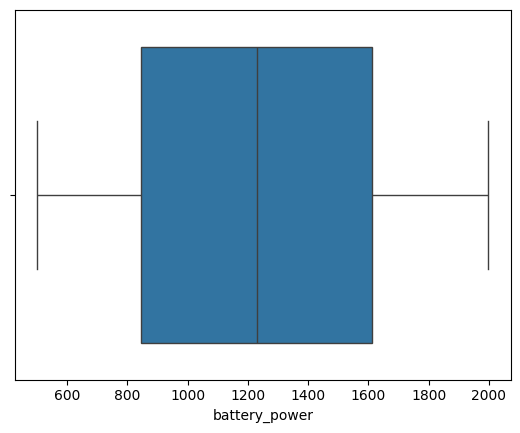

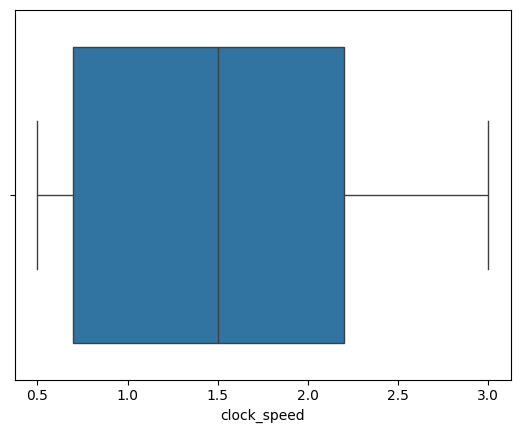

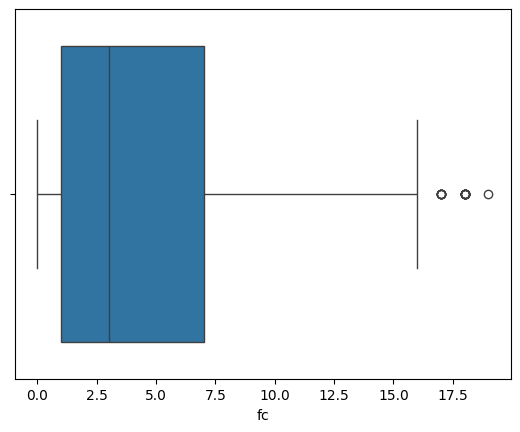

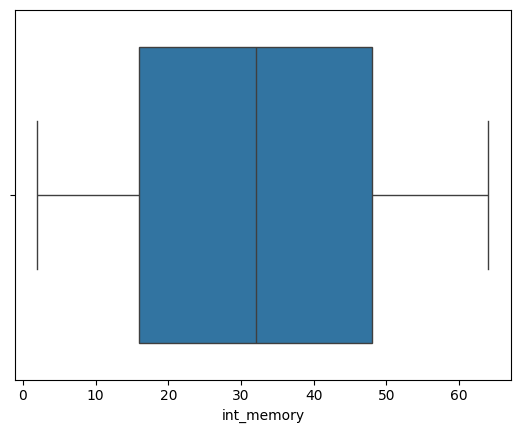

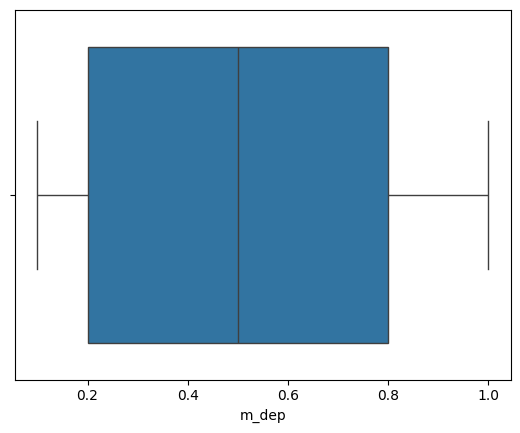

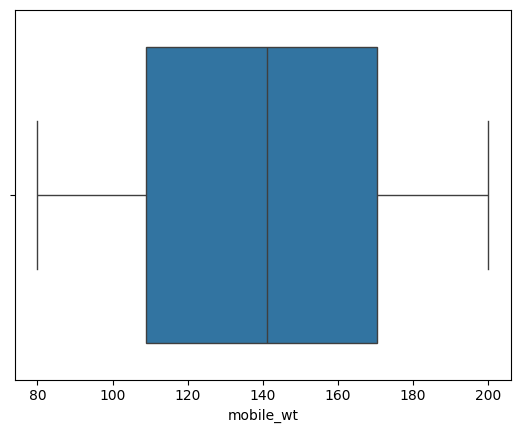

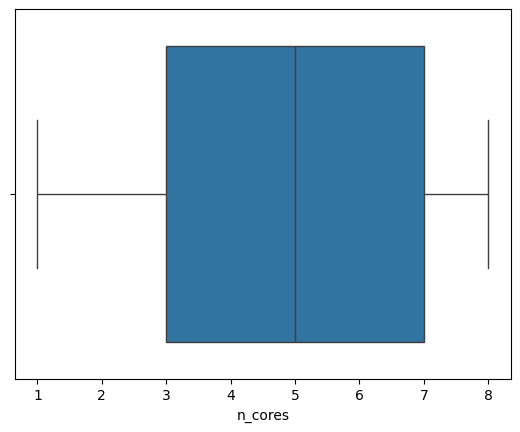

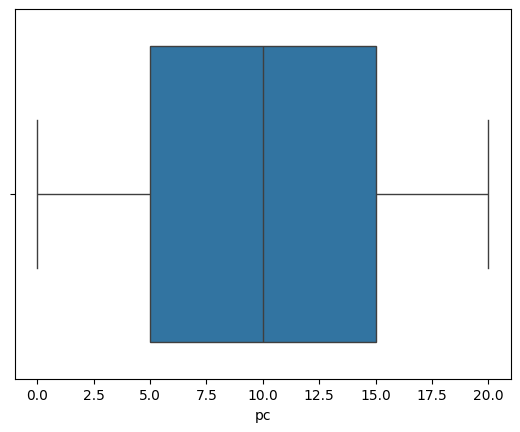

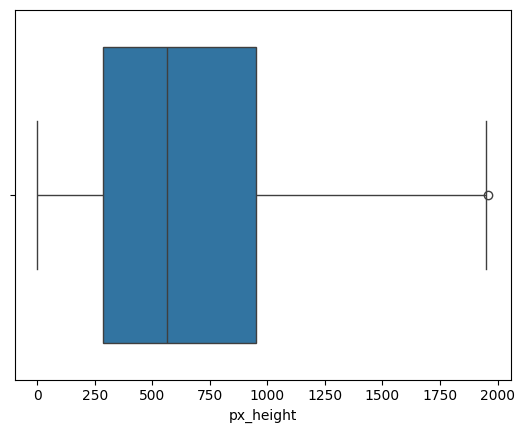

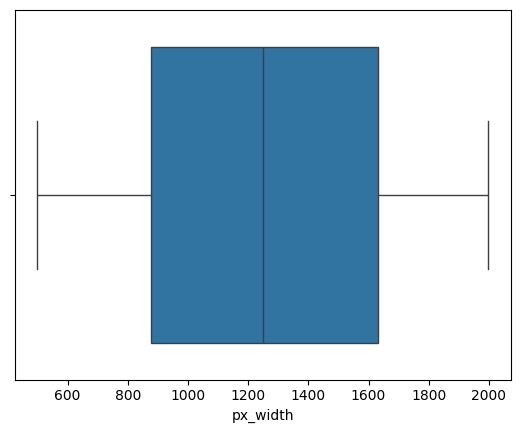

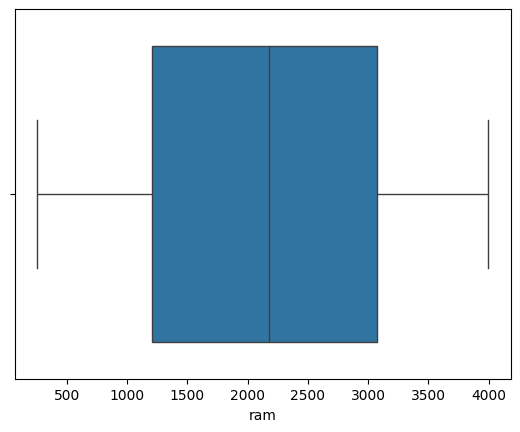

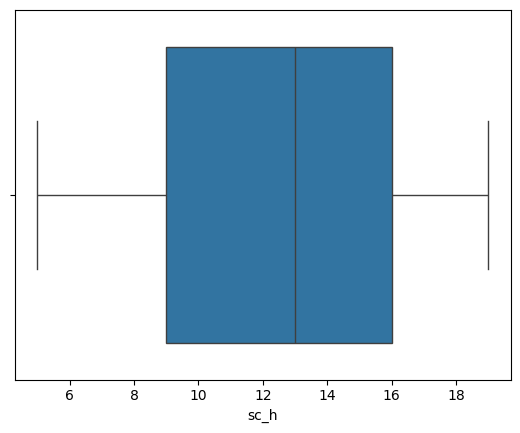

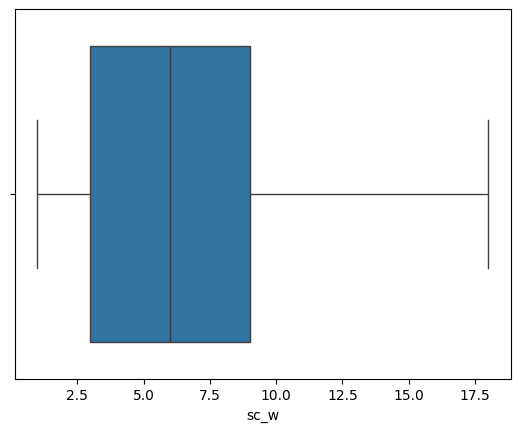

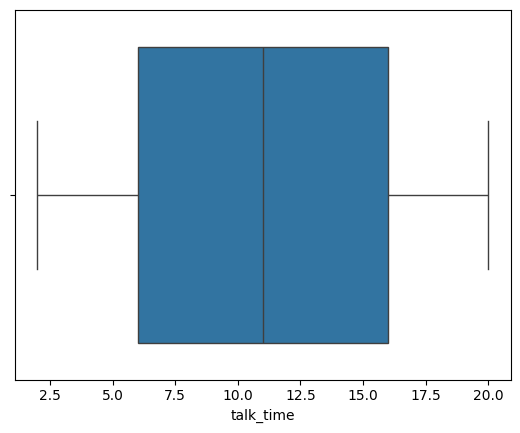

In [31]:
# Melihat tampilan data dalam boxplot
for feat in numerical_features:
    sns.boxplot(x= feat, data=phone_df)
    plt.show()